## 가설 검증해보기
# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설을 검정해 봅니다.

# 라이브러리 로드

In [4]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 불러오기'
# 구버전 주피터 노트북에서는 %matplotlib inline 설정을 해야 노트북 안에서 그래프를 시각화 할 수 있다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 설정

In [6]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보임
# 한글이 출력될 수 있게 폰트 설정
# 운영체제별 설정을 위해 로드하기

import os
# 윈도우, 맥 외의 os는 별도로 설정하기
if os.name == 'nt':
    plt.rc("font", family="Malgun Gothic")
else:
    plt.rc("font", family="AppleGothic")

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [8]:
# 레티나 설정을 해주면 글씨가  좀 더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
* 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.

In [14]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어오기
# 파일을 읽어온 후 shape 로 행과 열의 수 출력

df = pd.read_csv("data\국민건강보험공단_건강검진정보_20191231.csv", encoding="cp949")
df.shape

(1000000, 34)

## 데이터 미리보기

In [17]:
# sample, head, tail 을 통해 데이터 미리보기 하기
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [18]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,...,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999996,2019,999997,11,1,9,170,55,75.0,0.9,0.8,...,27.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,...,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,...,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999999,2019,1000000,11,2,10,155,65,86.0,0.5,0.5,...,9.0,1.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231


In [22]:
df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
67189,2019,67190,30,2,12,155,55,85.0,1.0,1.0,...,26.0,1.0,1.0,1,1.0,미시행,미시행,미시행,1.0,20191231


# 기본정보 보기

In [23]:
# info 를 통해 데이터의 크기, 형식, 메모리 사용량 볼 수 있다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [26]:
# 컬럼의 수가 많을 때, 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [28]:
# dtypes 를 통해 데이터 형식만 출력
df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

# 결측치 보기

In [34]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum 을 하면 컬러마다의 결측치 수를 알 수 있다.

df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [35]:
# isna 로도 결측치 여부를 확인하고 sum 을 통해 결측치 수를 집계할 수 있다.

df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

<AxesSubplot:>

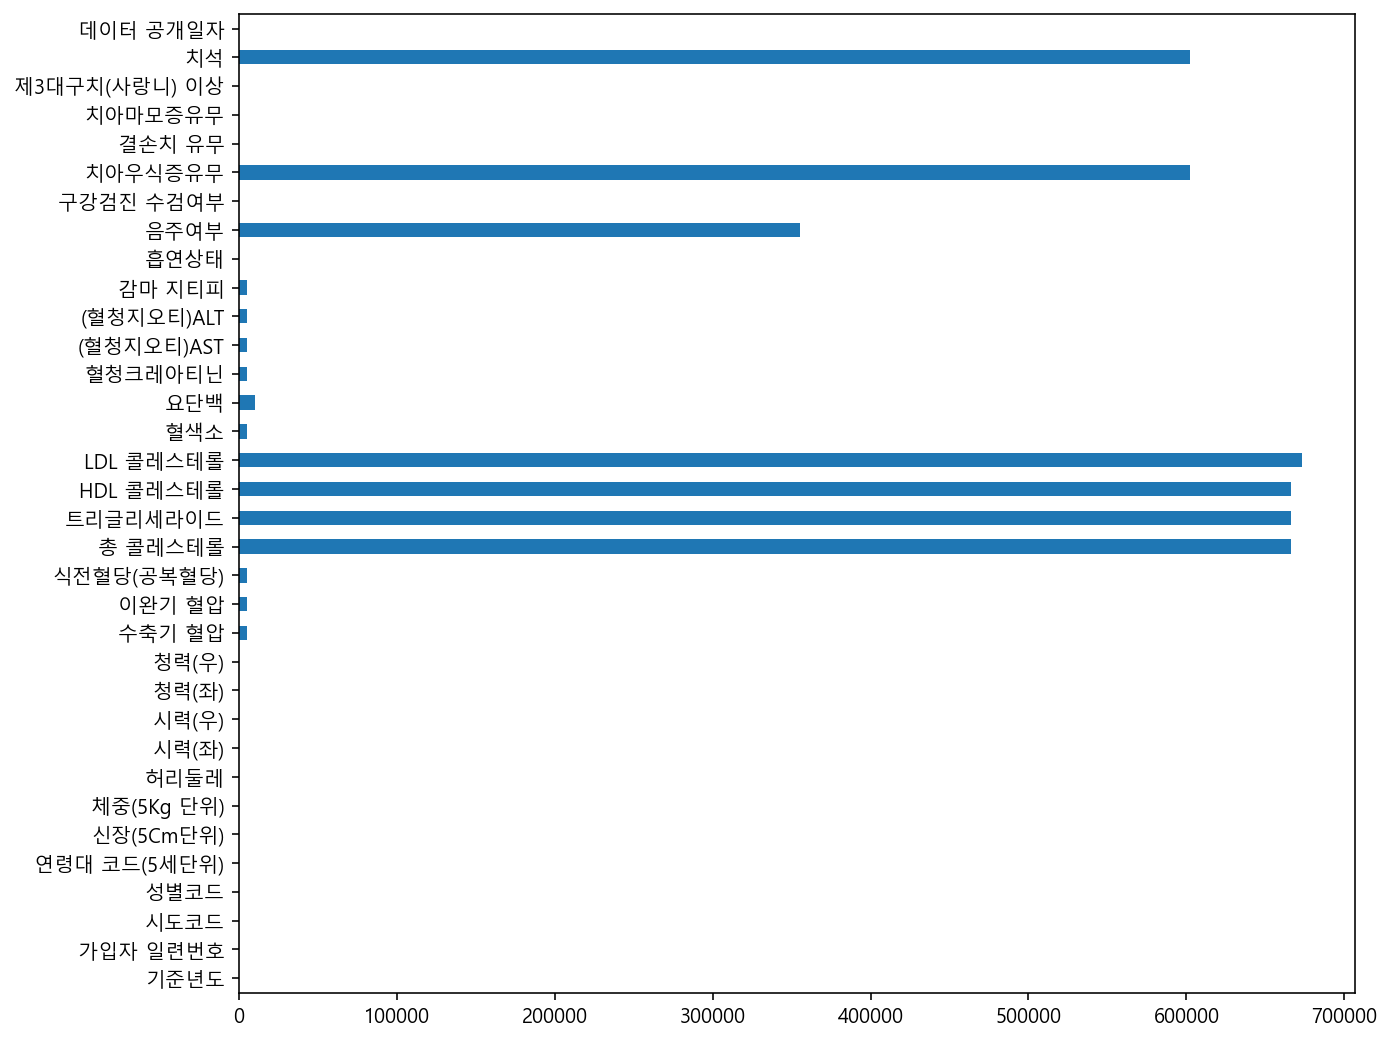

In [41]:
# 판다스에 내장된 plot 을 통해 시각화 할 수 있다.

df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [46]:
# 여러 컬럼 가져오기
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,32.0,18.0
1,8.0,15.0
2,21.0,30.0
3,19.0,17.0
4,24.0,19.0


In [48]:
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 요약하기

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994477.000000,994478.000000
mean,25.996708,26.231107
std,27.710895,24.046478
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,7362.000000


# value_counts 로 값 집계하기

In [52]:
# value_counts 를 통해 성별코드로 그룹화하고 갯수 집계

df["성별코드"].value_counts()

1    519574
2    480426
Name: 성별코드, dtype: int64

In [53]:
# value_counts 를 통해 흡연상태로 그룹화하고 갯수 집계

df["흡연상태"].value_counts()

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

# groupby 와 pivot_table 사용하기
## groupby

In [60]:
# groupby 를 통해 데이터를 그룹화한다.
# 성별코드로 그룹화한 데이터 세어보기

df.groupby(["성별코드"])["가입자 일련번호"].count()

성별코드
1    519574
2    480426
Name: 가입자 일련번호, dtype: int64

In [61]:
# 성별코드와 음주여부로 그룹화하고 갯수 세어보기

df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0          7
      1.0     401249
2     0.0         11
      1.0     243651
Name: 가입자 일련번호, dtype: int64

In [63]:
# 성별코드와 음주여부로 그룹화하고 감마지티피의 평균 구하기

df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

성별코드  음주여부
1     0.0     26.000000
      1.0     52.159757
2     0.0     27.000000
      1.0     23.565117
Name: 감마 지티피, dtype: float64

In [64]:
# 성별코드와 음주여부로 그룹화하고 감마지티피의 요약수치 구하기

df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

count       mean        std   min   25%   50%   75%    max
성별코드 음주여부                                                               
1    0.0        7.0  26.000000  12.897028  10.0  18.5  21.0  34.0   46.0
     1.0   400496.0  52.159757  62.807391   1.0  22.0  34.0  58.0  999.0
2    0.0       11.0  27.000000  15.968719   5.0  16.5  20.0  40.5   53.0
     1.0   243215.0  23.565117  31.881879   1.0  13.0  16.0  24.0  999.0

In [68]:
# agg 을 사용하면 여러 수치를 함께 구할 수 있다.

df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0        7  26.000000    21.0
     1.0   400496  52.159757    34.0
2    0.0       11  27.000000    20.0
     1.0   243215  23.565117    16.0

## pivot_table

In [77]:
# 음주여부에 따른 그룹화된 수를 피보테이블로 구하기

df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
성별코드,
1,519574
2,480426


In [81]:
# 음주여부에 따른 감마지티피의 평균 구하기

pd.pivot_table(df, index="음주여부", values="감마 지티피")

,감마 지티피
음주여부,
0.0,26.611111
1.0,41.355770


In [83]:
# 기본값은 평균을 구하지만 aggfunc 을 통해 지정해 줄 수도 있다.

pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc="mean")

,감마 지티피
음주여부,
0.0,26.611111
1.0,41.355770


In [84]:
# aggfunc 에 여러 값을 한 번에 지정할 수도 있다.

pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,26.611111,20.5
1.0,41.355770,26.0


In [85]:
# aggfunc 에 describe 를 사용해 통계요약값을 한 번에 볼 수도 있다.

pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,17.25,20.5,39.5,18.0,53.0,26.611111,5.0,14.455363
1.0,17.00,26.0,45.0,643711.0,999.0,41.355770,1.0,55.050548


In [87]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구하기

pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마 지티피")

감마 지티피
성별코드 음주여부           
1    0.0   26.000000
     1.0   52.159757
2    0.0   27.000000
     1.0   23.565117

# 전체 데이터 시각화하기
* 100만개가 넘는 데이터를 시각활할 때는 되도록이면 groupby 혹은 pivot_table 로 연산을 하고 시각화 하는 것을 권장한다.
* 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있다.

## 히스토그램
* 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어진것을 확인할 수 있다.
* 히스토그램을 사용하면 수치 데이터를 bin의 갯수만큼 그룹화해서 도수분포표를 만들고 그 결과를 시각화한다.
* 이 데이터에는 수치 데이터가 많기 때문에 판다스의 hist 를 사용해서 히스토그램을 그린다.

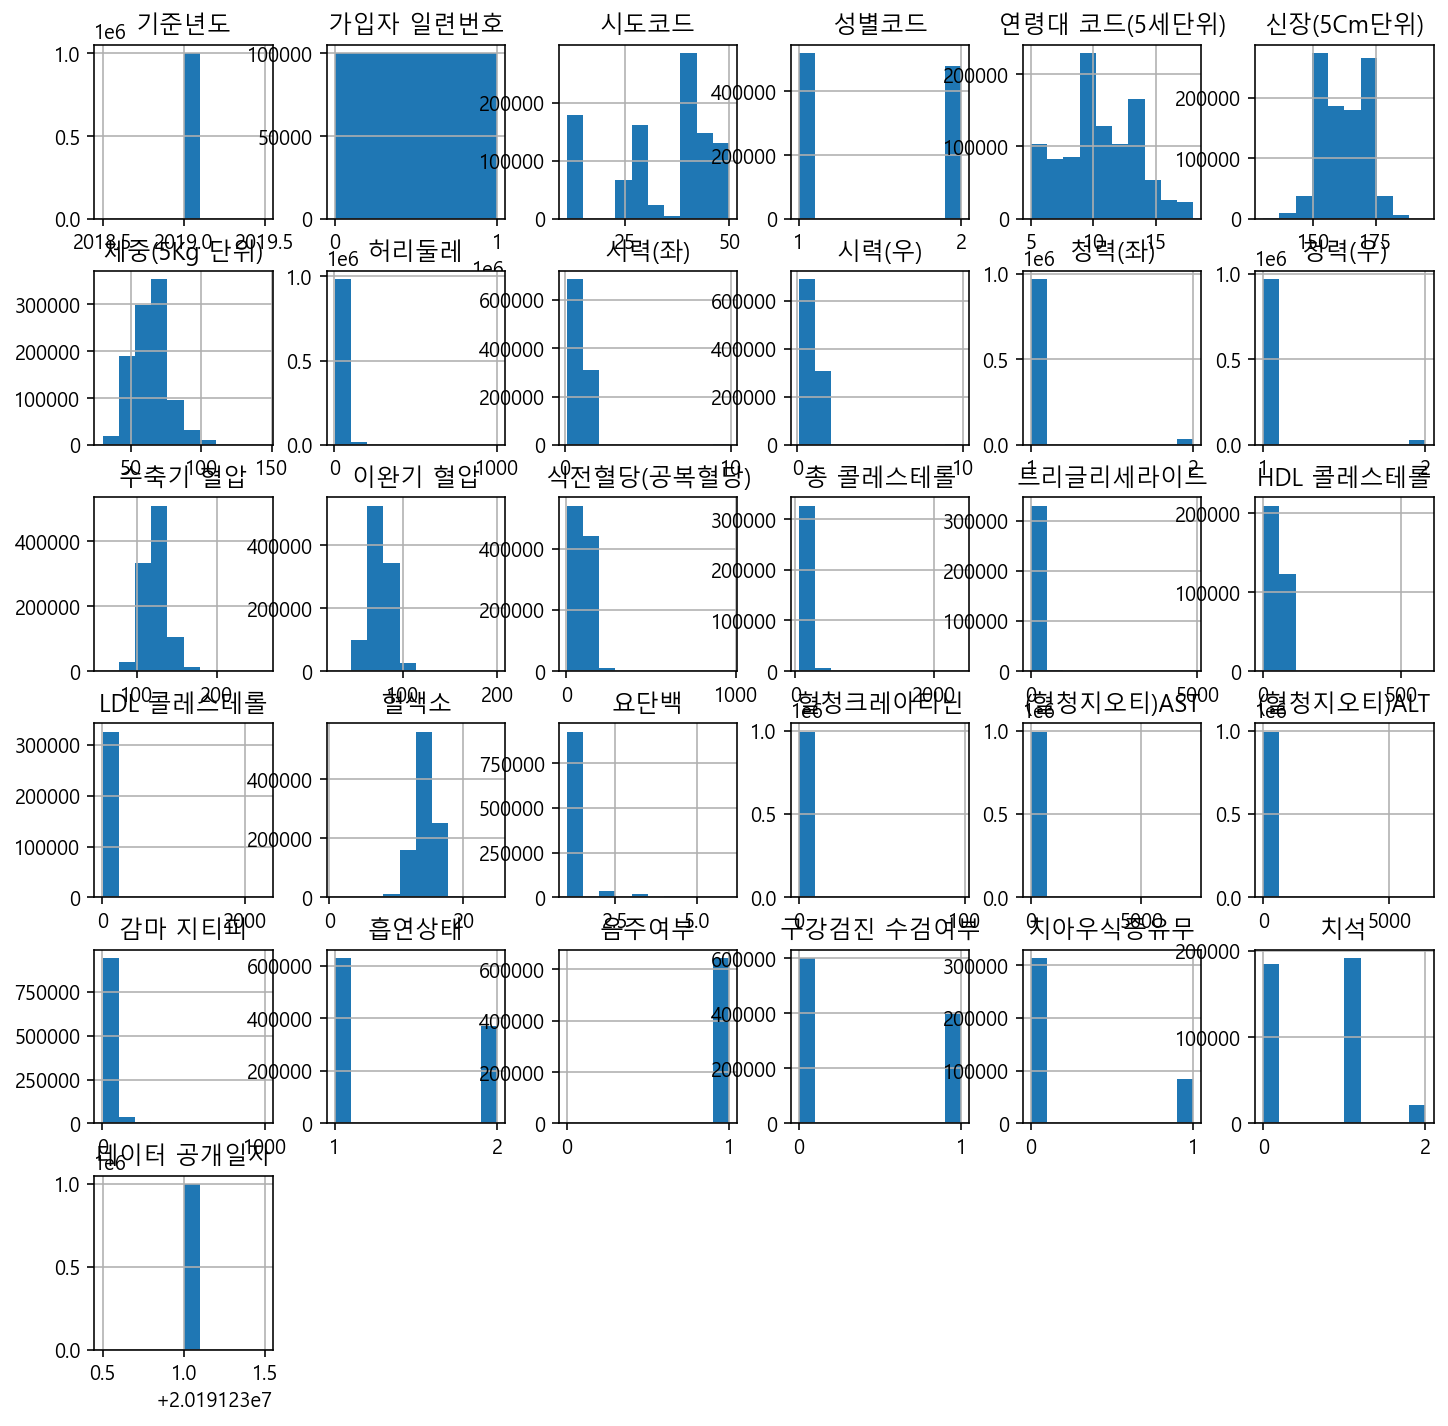

In [94]:
# 전체 데이터에 대한 히스토그램 출력

h = df.hist(figsize=(12,12))

## 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터를 나누어 그린다.
* 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능하다.
* iloc[행,열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:,:]을 사용한다.
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작 인덱스:끝나는 인덱스(+1) 를 지정할 수 있다.

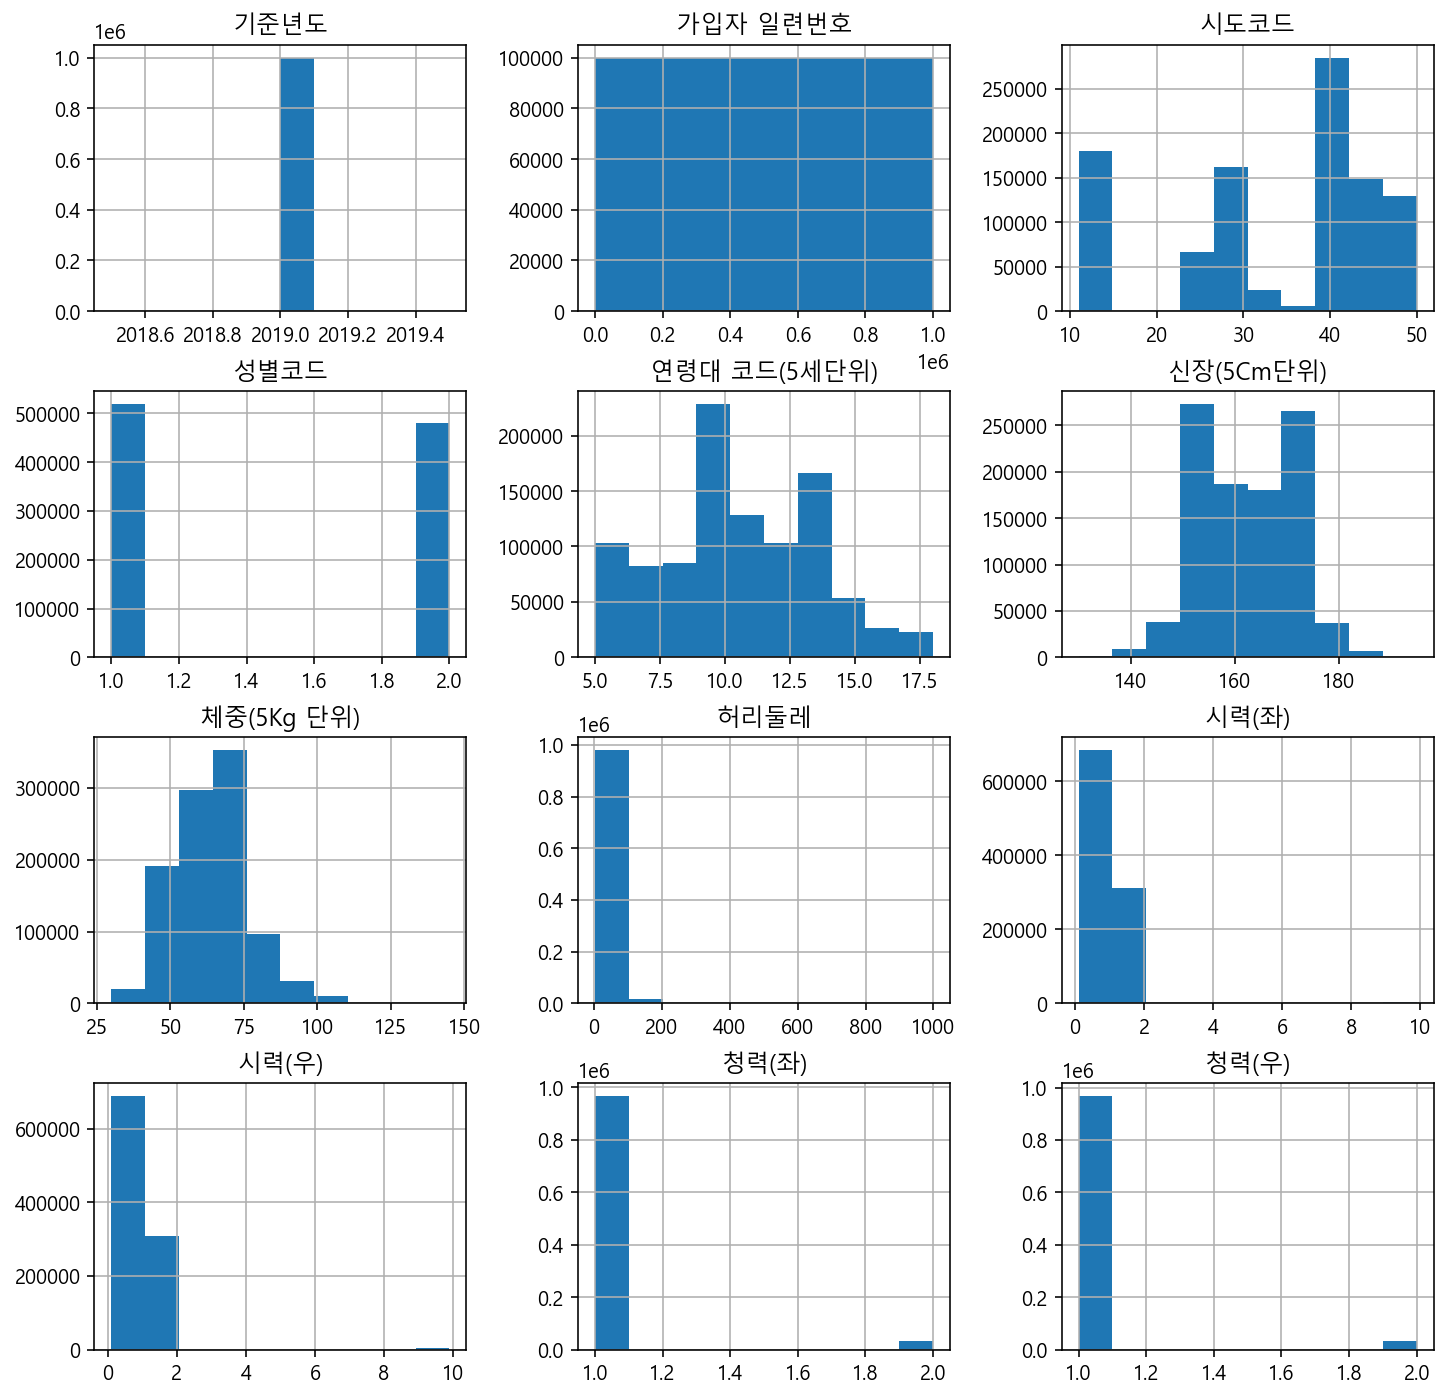

In [95]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그린다.
# [행, 열]

h = df.iloc[:, :12].hist(figsize=(12,12))

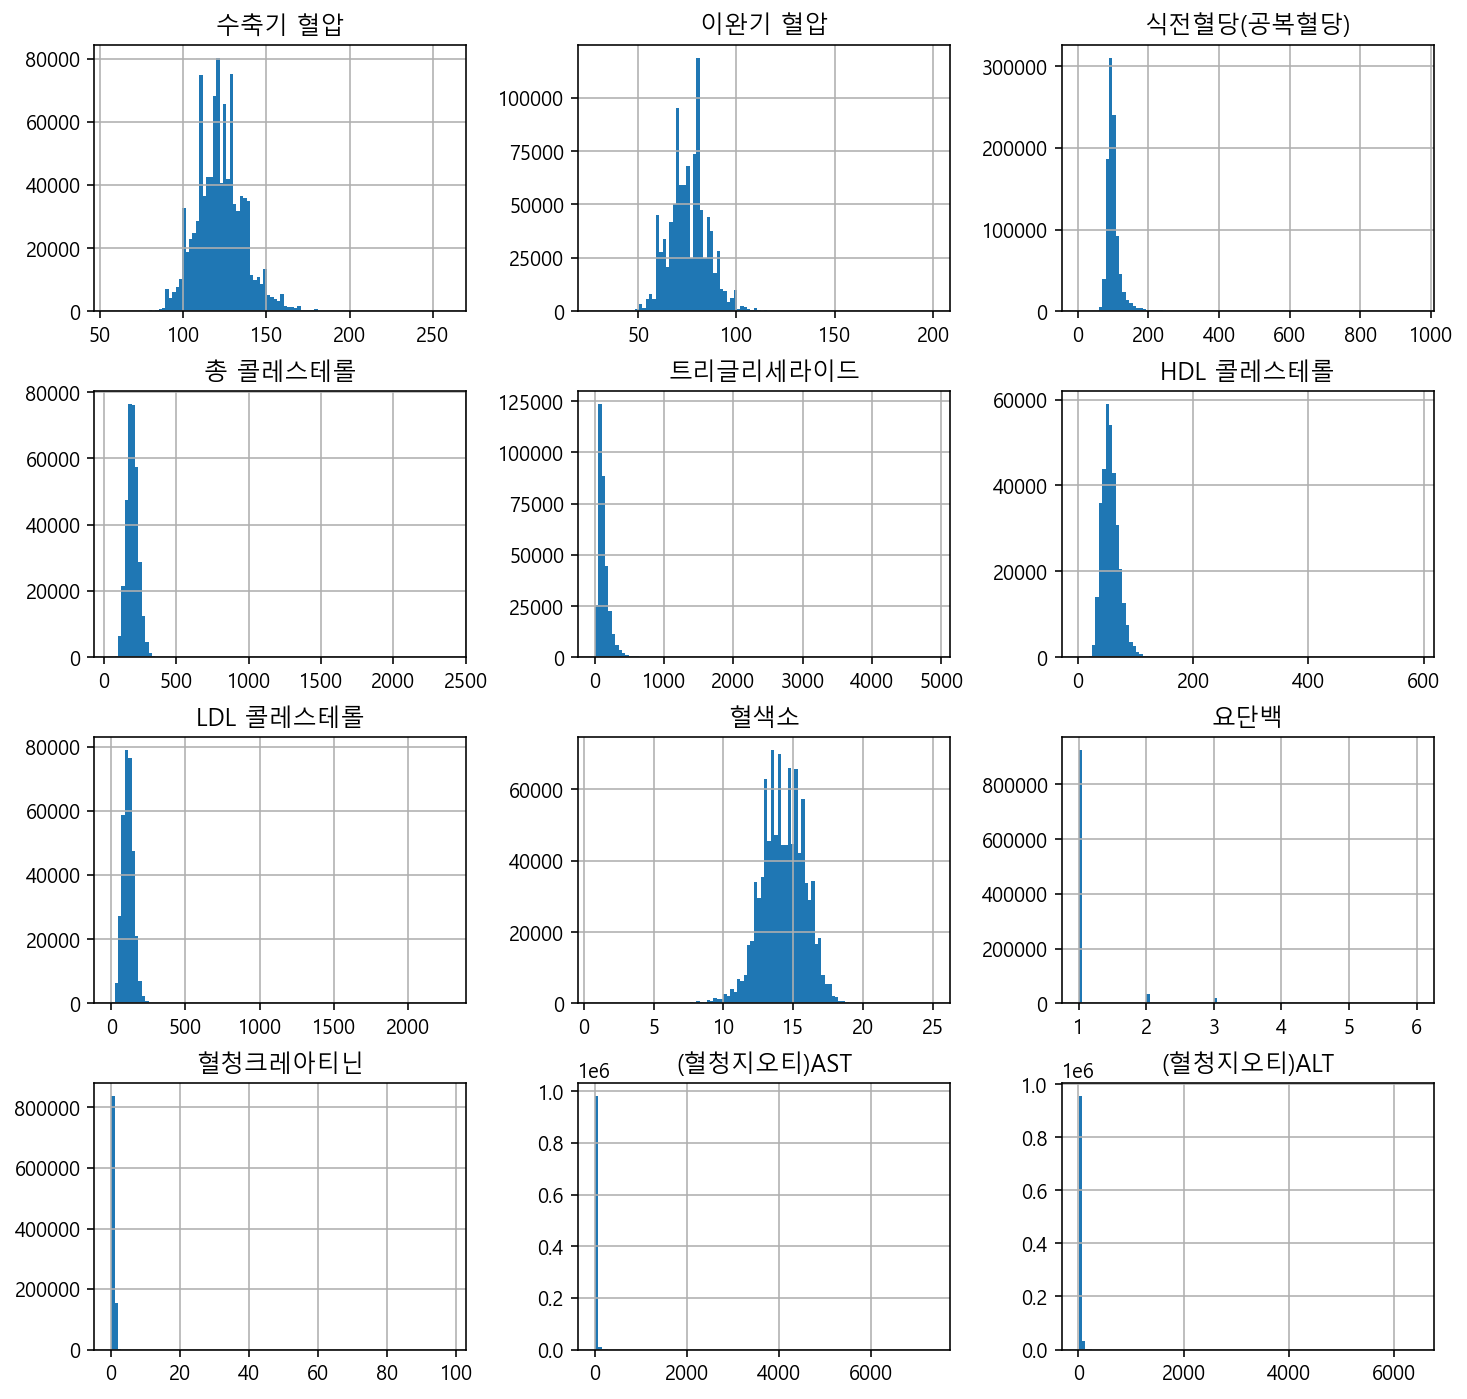

In [98]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그린다.

h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100)

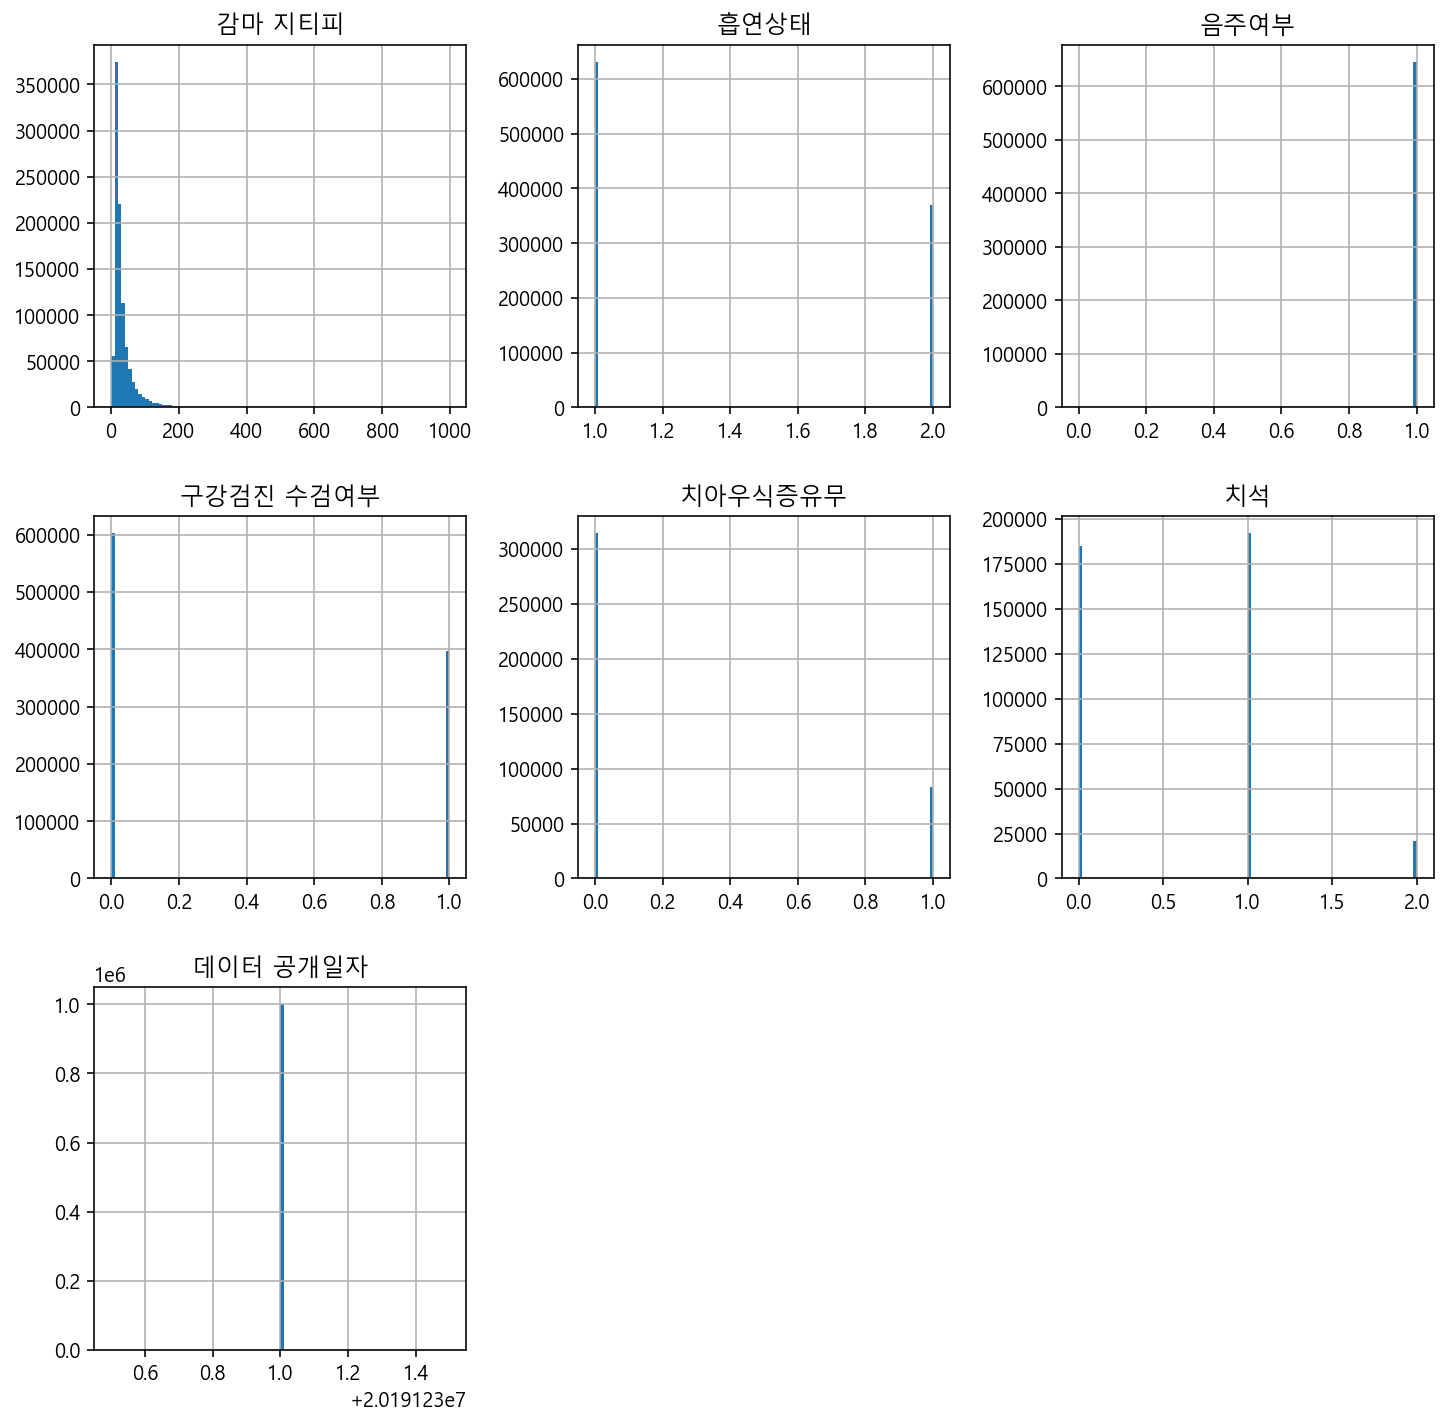

In [99]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램을 그린다.

h = df.iloc[:, 24:].hist(figsize=(12,12), bins=100)